In [1]:
# Create the data frame
data <- read.csv("melon.csv")

NameError: name 'data' is not defined

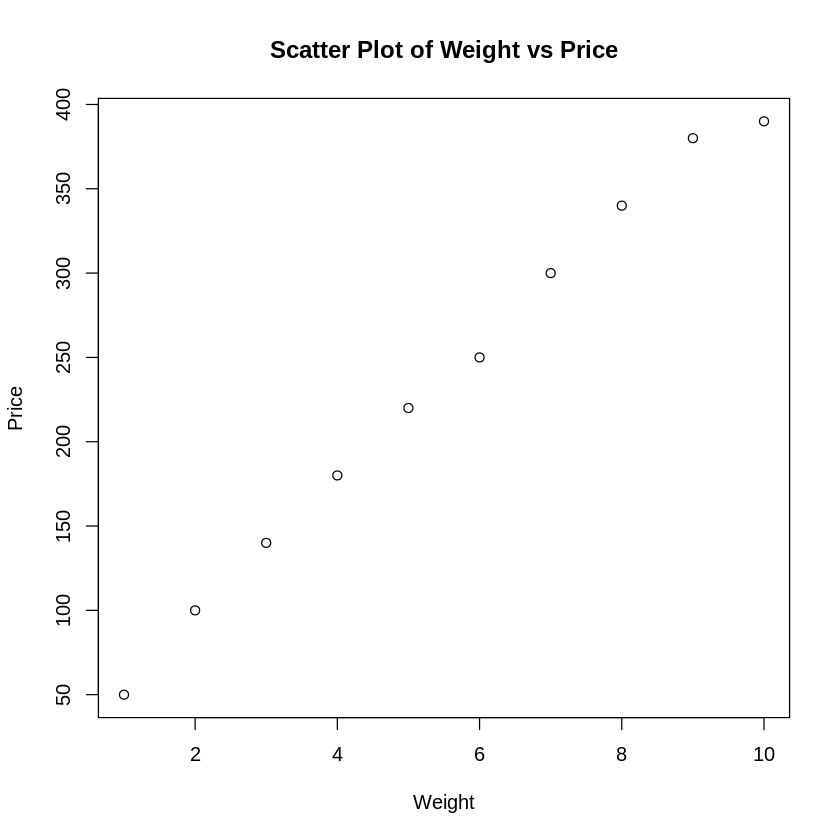

In [22]:

# Create the scatter plot
plot(data$Weight,data$Price,
     xlab = "Weight",
     ylab = "Price",
     main = "Scatter Plot of Weight vs Price")

In [23]:
install.packages('caTools')
install.packages("ggplot2")
library(caTools)
library(ggplot2)
split = sample.split(data$Weight, SplitRatio = 0.7)
trainingset = subset(data, split == TRUE)
testset = subset(data, split == FALSE)
Weight<-data$Weight
Price<-data$Price
# Fitting Simple Linear Regression to the Training set
linear_model= lm(Price ~ Weight, trainingset)
#Summary of the model
summary(linear_model)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Call:
lm(formula = Price ~ Weight, data = trainingset)

Residuals:
      1       2       3       4       5       7       8 
-5.8333  3.3333  2.5000  1.6667  0.8333 -0.8333 -1.6667 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   15.000      2.665   5.629  0.00245 ** 
Weight        40.833      0.544  75.067 7.95e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.416 on 5 degrees of freedom
Multiple R-squared:  0.9991,	Adjusted R-squared:  0.9989 
F-statistic:  5635 on 1 and 5 DF,  p-value: 7.948e-09


In [24]:

# Create a data frame with new input values
new_data <- data.frame(Weight = c(4, 5, 6))

# Predict using the linear regression model
predicted_Price <- predict(linear_model, newdata = new_data)

# Display the predicted salaries
print(predicted_Price)

       1        2        3 
178.3333 219.1667 260.0000 


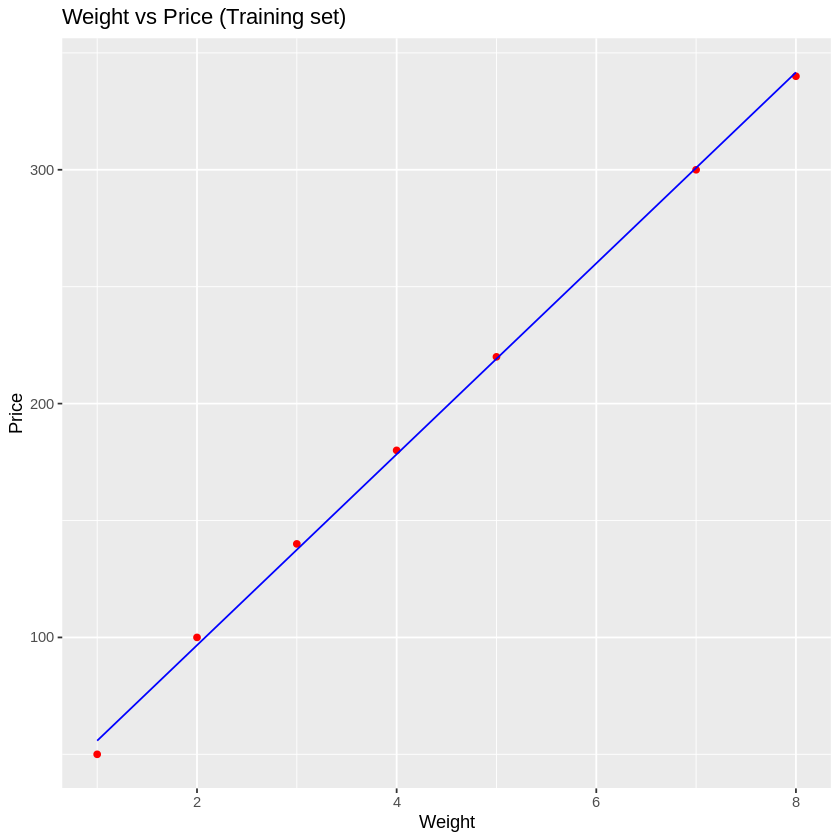

In [27]:

# Visualising the Training set results
ggplot() + geom_point(aes(x = trainingset$Weight,
                          y = trainingset$Price), colour = 'red') +
  geom_line(aes(x = trainingset$Weight,
                y = predict(linear_model, newdata = trainingset)), colour = 'blue') +

  ggtitle('Weight vs Price (Training set)') +
  xlab('Weight') +
  ylab('Price')

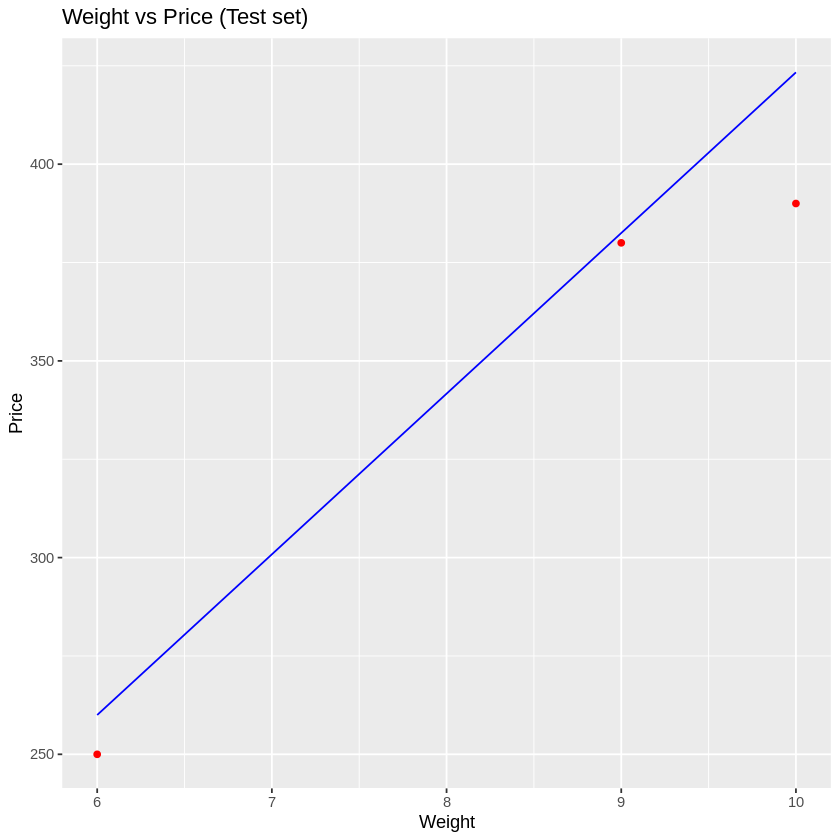

In [28]:

# Visualising the Test set results
ggplot() +
  geom_point(aes(x = testset$Weight, y = testset$Price),
             colour = 'red') +
  geom_line(aes(x = testset$Weight,
                y = predict(linear_model, newdata = testset)),
            colour = 'blue') +
  ggtitle('Weight vs Price (Test set)') +
  xlab('Weight') +
  ylab('Price')